<a href="https://colab.research.google.com/github/piercepatrick/Titans_2019_FF_Analysis/blob/master/Tannehilll_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Statistical Analysis of Ryan Tannehill's 2019 Fantasy Football Season using Python** 

![alt text](https://static.clubs.nfl.com/image/private/t_editorial_landscape_8_desktop_mobile/f_auto/titans/uri6fr8vhrjsusquizlt.jpg)




After being traded for a fourth round pick from the Miami Dolphins to the Tennessee Titans in the midst of 2019 free agency, Ryan Tannehill joined a Titans team in the backup role to 5th year Marcus Mariota. After starting the season a mere 2-4, it was Tannehill's opportunity to jumpstart a struggling Tennessee offense with a first year offensive coordinator. Over the remaining 10 games, Tannehill led the Titans to a 7-3 record with key wins over the Kansas City Chiefs and Houston Texans, leading them back to NFL Playoffs. The Tannehill led Titans finished within the top 10 scoring offenses in the league, and Tannehill led the league in both yards per attempt and qb rating while also finishing third best in completion percentage. 

  During the Titan's playoff push, more than Titan's fans began to take notice of Tannehill. The 31 year old small market quarterback began to catch the eyes of many Fantasy Football team owners, as well. According to Tristan Crockett of ESPN, "Quarterback Ryan Tannehill and wide receiver A.J. Brown of the Tennessee Titans found themselves on a finalist's roster in 27.9% and 33.7% of ESPN leagues, the duo ranking among the five players who have seen the greatest such increase compared with their percentages of playoff qualifiers. Tannehill was on only 10.0% and Brown 9.8% of playoff teams, underscoring how important they have been on the add/drop front." 

Crockett writes, "Tannehill and Brown's 51.7 fantasy points in Weeks 14-15 combined were fourth-most among quarterbacks, and Brown's 59.0 PPR fantasy points were second-most behind only Thomas'." The emergence of Ryan Tannehill proved to be one of the defining moves in Fantasy leagues as both Tannehill's and AJ Browns average draft position was undrafted. Whichever owner decided Tannehill was at least worth a bench spot, was likely gearing up for their championship in week 16(like me). In a season where several QB's saw significant injuries (Ben Roelthisberger, Cam Newton, etc.) acquiring Tannehill off your league's waiver wire may have proved one of the best decisions of your season. As the Fantasy Footballers always say, leagues are won on the waiver wire, not at the draft. 

Tannehill's 2019 performance earned him a trip to his first pro bowl, AP/PFWA Comeback Player of the Year, two playoff wins, and a four-year extension worth 118 million including 62 million in fully guaranteed money and 91 million in total guarantees. However, this analysis serves to investigate how goood Tannehill really was, how he elevated the team, and if this production is sustainable.

![alt text](https://www.wkrn.com/wp-content/uploads/sites/73/2019/12/IMG_8476.jpg?w=800)

In [1]:
# !pip install brewer2mpl
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pylab import rcParams

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.2.2
0.10.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
WEEKLY_BASE_URL = '/content/drive/My Drive/DS/Titans FF Analysis/data_v2/weekly/2019/week{}.csv'
YEARLY_BASE_URL = '/content/drive/My Drive/DS/Titans FF Analysis/data_v2/yearly/2019.csv'

In [3]:
def generate_df():
  df = pd.DataFrame()
  for week in range(1, 18):
    weekly_df = pd.read_csv(WEEKLY_BASE_URL.format(week))
    weekly_df['Week'] = week
    df = pd.concat([df, weekly_df])
  return df

df = generate_df()
year_df = pd.read_csv(YEARLY_BASE_URL)


In [4]:
df.head()

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40,1
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10,1
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32,1
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32,1


In [5]:
year_df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,Att.1,Yds.1,Tgt,Rec,Yds.2,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,287.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,469.20
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,303.0,1540.0,24.0,18.0,206.0,11.44,5.0,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,294.60
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,236.0,1084.0,68.0,49.0,474.0,9.67,3.0,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,314.80
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,301.0,1357.0,71.0,54.0,420.0,7.78,3.0,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,311.70


In [6]:
df.rename({'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

In [7]:
year_df.rename({'Yds': 'PassingYDs',
'Yds.1': 'RushingYDs',
'Yds.2': 'ReceivingYDs',
'Att': 'PassingAtt',
'Att.1': 'RushingAtt'
}, axis=1, inplace=True)

In [8]:
df['TotalTD'] = df['PassingTD'] + df['RushingTD'] + df['ReceivingTD']
year_df['TotalTD'] = year_df['PassingTD'] + year_df['RushingTD'] + year_df['ReceivingTD']

In [9]:
year_df['FantasyPoints'] = year_df['FantasyPoints'] - year_df['Rec'] 
year_df['FantasyPoints'] = year_df['FantasyPoints'] + year_df['Rec']*0.5
year_df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingAtt,PassingYDs,Int,RushingAtt,RushingYDs,Tgt,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,TotalTD
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,287.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,0.0,2.0,1387.0,15.0,287.0,1005.0,4.0,411.20,19.0
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68,43.0
2,2,Derrick Henry,TEN,RB,25.0,15.0,15.0,0.0,0.0,0.0,0.0,303.0,1540.0,24.0,18.0,206.0,11.44,5.0,3.0,0.0,0.0,0.0,1540.0,16.0,303.0,206.0,2.0,285.60,18.0
3,3,Aaron Jones,GNB,RB,25.0,16.0,16.0,0.0,0.0,0.0,0.0,236.0,1084.0,68.0,49.0,474.0,9.67,3.0,2.0,0.0,0.0,0.0,1084.0,16.0,236.0,474.0,3.0,290.30,19.0
4,4,Ezekiel Elliott,DAL,RB,24.0,16.0,16.0,0.0,0.0,0.0,0.0,301.0,1357.0,71.0,54.0,420.0,7.78,3.0,2.0,0.0,0.0,0.0,1357.0,12.0,301.0,420.0,2.0,284.70,14.0


In [10]:
df = df.drop(['PPRFantasyPoints', 'StandardFantasyPoints'], axis = 1)

In [11]:
df.rename(columns = {'HalfPPRFantasyPoints': 'FantasyPoints'}, inplace = True)

In [12]:
df['Usage'] = df['Tgt'] + df['RushingAtt']
df.head()

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,FantasyPoints,Week,TotalTD,Usage
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,1,5.0,3.0
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,1,4.0,4.0
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,1,1.0,4.0
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,1,3.0,1.0
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,1,2.0,6.0


In [13]:
year_df.drop(['PassingYds', 'RushingYds', 'ReceivingYds'], axis =1, inplace = True)

In [14]:
year_df = year_df.loc[:, ~year_df.columns.duplicated()].copy()
year_df['Usage'] = year_df['Tgt'] + year_df['RushingAtt']

In [15]:
year_df['UsageRank'] = year_df['Usage'].rank(ascending = False)
year_df['FantasyPointsRank'] = year_df['FantasyPoints'].rank(ascending = False)
year_df['FantasyPoints/GM'] = year_df['FantasyPoints'] / year_df['G']
year_df['FantasyPoints/GM_Rank'] = year_df['FantasyPoints'].rank(ascending = False)
year_df['FantasyPoints/GM'] = year_df['FantasyPoints/GM'].apply(lambda x: round(x,2))
year_df.sort_values(by='FantasyPoints/GM_Rank').head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingAtt,PassingYDs,Int,RushingAtt,RushingYDs,Tgt,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingTD,RushingTD,ReceivingTD,FantasyPoints,TotalTD,Usage,UsageRank,FantasyPointsRank,FantasyPoints/GM,FantasyPoints/GM_Rank
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.00,9.0,2.0,36.0,7.0,0.0,415.68,43.0,176.0,34.0,1.0,27.71,1.0
0,0,Christian McCaffrey,CAR,RB,23.0,16.0,16.0,0.0,2.0,0.0,0.0,287.0,1387.0,142.0,116.0,1005.0,8.66,1.0,0.0,0.0,15.0,4.0,411.20,19.0,429.0,1.0,2.0,25.70,2.0
11,11,Dak Prescott,DAL,QB,26.0,16.0,16.0,388.0,596.0,4902.0,11.0,52.0,277.0,0.0,0.0,0.0,0.00,6.0,2.0,30.0,3.0,0.0,335.78,33.0,52.0,193.5,3.0,20.99,3.0
13,13,Russell Wilson,SEA,QB,31.0,16.0,16.0,341.0,516.0,4110.0,5.0,75.0,342.0,0.0,0.0,0.0,0.00,8.0,2.0,31.0,3.0,0.0,326.60,34.0,75.0,139.5,4.0,20.41,4.0
16,16,Deshaun Watson,HOU,QB,24.0,15.0,15.0,333.0,495.0,3852.0,12.0,82.0,413.0,1.0,1.0,6.0,6.00,10.0,3.0,26.0,7.0,1.0,318.48,34.0,83.0,127.0,5.0,21.23,5.0


In [16]:
qb_df = year_df.loc[year_df['Pos'] == 'QB'].copy()
qb_df

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,PassingAtt,PassingYDs,Int,RushingAtt,RushingYDs,Tgt,Rec,ReceivingYDs,Y/R,Fumbles,FumblesLost,PassingTD,RushingTD,ReceivingTD,FantasyPoints,TotalTD,Usage,UsageRank,FantasyPointsRank,FantasyPoints/GM,FantasyPoints/GM_Rank
1,1,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,176.0,1206.0,0.0,0.0,0.0,0.0,9.0,2.0,36.0,7.0,0.0,415.68,43.0,176.0,34.0,1.0,27.71,1.0
11,11,Dak Prescott,DAL,QB,26.0,16.0,16.0,388.0,596.0,4902.0,11.0,52.0,277.0,0.0,0.0,0.0,0.0,6.0,2.0,30.0,3.0,0.0,335.78,33.0,52.0,193.5,3.0,20.99,3.0
13,13,Russell Wilson,SEA,QB,31.0,16.0,16.0,341.0,516.0,4110.0,5.0,75.0,342.0,0.0,0.0,0.0,0.0,8.0,2.0,31.0,3.0,0.0,326.60,34.0,75.0,139.5,4.0,20.41,4.0
16,16,Deshaun Watson,HOU,QB,24.0,15.0,15.0,333.0,495.0,3852.0,12.0,82.0,413.0,1.0,1.0,6.0,6.0,10.0,3.0,26.0,7.0,1.0,318.48,34.0,83.0,127.0,5.0,21.23,5.0
29,29,Jameis Winston,TAM,QB,25.0,16.0,16.0,380.0,626.0,5109.0,30.0,59.0,250.0,0.0,0.0,0.0,0.0,12.0,5.0,33.0,1.0,0.0,297.36,34.0,59.0,172.0,7.0,18.59,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,Trevor Siemian,NYJ,QB,28.0,1.0,1.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12,0.0,0.0,592.0,546.0,0.12,546.0
600,600,Alex Tanney,NYG,QB,32.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,592.0,548.0,0.04,548.0
611,611,Blake Bortles,LAR,QB,27.0,3.0,0.0,1.0,2.0,3.0,0.0,2.0,-9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.78,0.0,2.0,529.0,612.0,-0.26,612.0
612,612,Sean Mannion,MIN,QB,27.0,3.0,1.0,12.0,21.0,126.0,2.0,6.0,-5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.46,0.0,6.0,449.0,614.0,-0.49,614.0


In [17]:
qb_df.drop(['Rec', 'Tgt', 'ReceivingYDs', 'ReceivingTD', 'Y/R'], axis=1,inplace = True)

In [18]:
qb_df['Y/A'] = qb_df['PassingYDs'] / qb_df['PassingAtt']

In [19]:
qb_df_week = df.loc[df['Pos'] == 'QB'].copy()
qb_df_week.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1,inplace = True)
qb_df_week['Y/A'] = qb_df_week['PassingYds'] / qb_df_week['PassingAtt']
qb_df_week.head()

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,FL,FantasyPoints,Week,TotalTD,Usage,Y/A
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,33.56,1,5.0,3.0,16.200000
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,33.40,1,4.0,4.0,12.656250
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,7.10,1,1.0,4.0,9.166667
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,27.32,1,3.0,1.0,11.454545
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,14.32,1,2.0,6.0,9.800000


# **How did Ryan Tannehill compare to other top Quarterbacks?**

![Mahomes](https://www.puntsports.com.au/wp-content/uploads/2020/01/13932941-1.jpg)

In [20]:
qb_df = qb_df[qb_df['PassingAtt'] > 200]
list_of_players = qb_df['Player'].to_list()
qb_df_week = qb_df_week[qb_df_week['Player'].isin(list_of_players)]

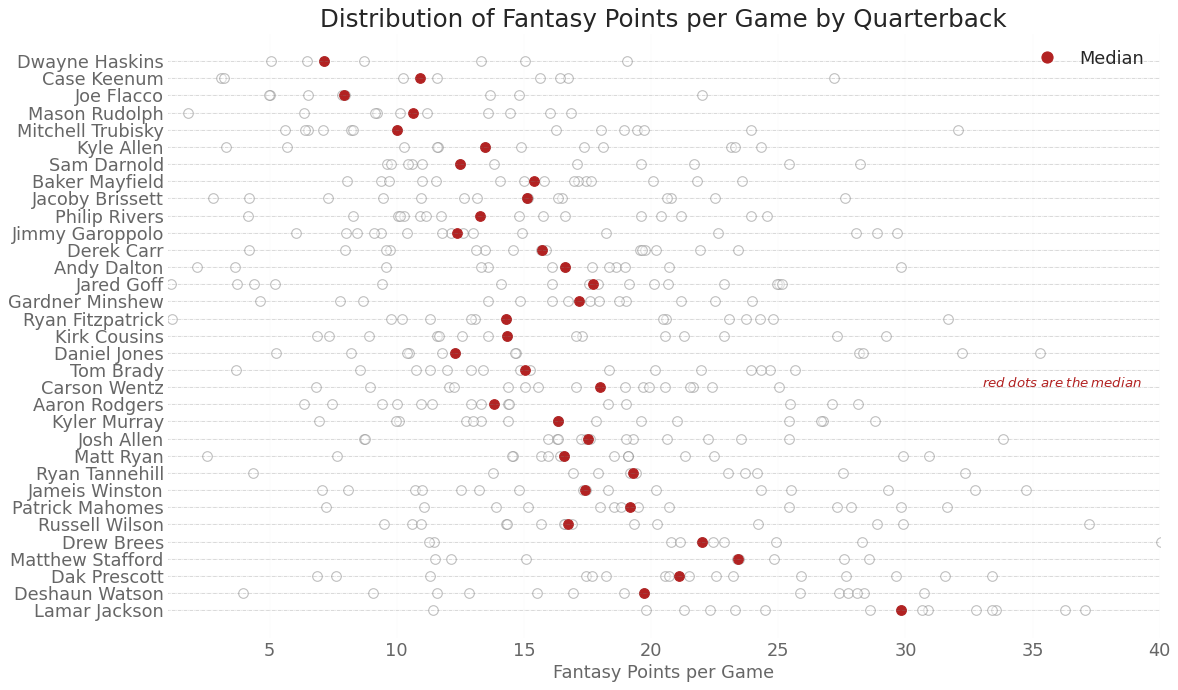

In [21]:
import matplotlib.patches as mpatches

# Mean and Median Fantasy Points by QB
graph_df = qb_df_week[['FantasyPoints', 'Player']].groupby('Player').apply(lambda x: x.mean())
graph_df.sort_values('FantasyPoints', ascending=False, inplace=True)
graph_df.reset_index(inplace=True)
graph_df_median = qb_df_week[['FantasyPoints', 'Player']].groupby('Player').apply(lambda x: x.median())

# Draw horizontal lines
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=graph_df.index, xmin=0, xmax=40, color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, qb in enumerate(graph_df.Player):
    df_qb = qb_df_week.loc[qb_df_week.Player==qb, :]
    ax.scatter(y=np.repeat(i, df_qb.shape[0]), x=df_qb.FantasyPoints, s=75, edgecolors='gray', c='w', alpha=0.5)
    ax.scatter(y=i, x='FantasyPoints', data=graph_df_median.loc[graph_df_median.index==qb, :], s=75, c='firebrick')

# Annotate    
ax.text(33, 13, "$red \; dots \; are \; the \: median$", fontdict={'size':12}, color='firebrick')

# Decorations
red_patch = plt.plot([],[], marker="o", ms=10, ls="", mec=None, color='firebrick', label="Median")
plt.legend(handles=red_patch)
ax.set_title('Distribution of Fantasy Points per Game by Quarterback', fontdict={'size':22})
ax.set_xlabel('Fantasy Points per Game', alpha=0.7)
ax.set_yticks(graph_df.index)
ax.set_yticklabels(graph_df.Player.str.title(), fontdict={'horizontalalignment': 'right'}, alpha=0.7)
ax.set_xlim(1, 40)
plt.xticks(alpha=0.7)
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.grid(axis='both', alpha=.4, linewidth=.1)
plt.show()

 Tannehill's 178.4 fantasy points since taking over as the Titans' starting quarterback in Week 7 ranked third-best at the position and fifth-best overall.

In [22]:
top_qbs = pd.read_csv('/content/drive/My Drive/DS/Titans FF Analysis/QBs - Sheet1 - QBs - Sheet1 (1).csv')
top_qbs.set_index('Week', drop = True, inplace = True)
top_qbs.head()

,Tannehill,Mahomes,Wilson,Jackson
Week,,,,
1,NaN,27.32,16.60,33.56
2,NaN,31.62,24.20,30.88
3,NaN,27.86,41.34,21.28
4,NaN,18.00,14.30,24.48
5,NaN,18.54,29.92,11.44


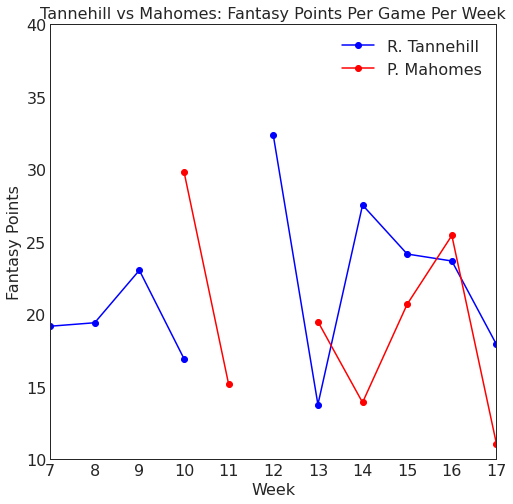

In [23]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 8
tannehill, = plt.plot(top_qbs.Tannehill, 'o-', color='blue')
mahomes, = plt.plot(top_qbs.Mahomes, 'o-',color = 'red') 
plt.title('Tannehill vs Mahomes: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.ylim(10,40)
plt.yticks([10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, mahomes], ['R. Tannehill', 'P. Mahomes'])
plt.style.use('fivethirtyeight')

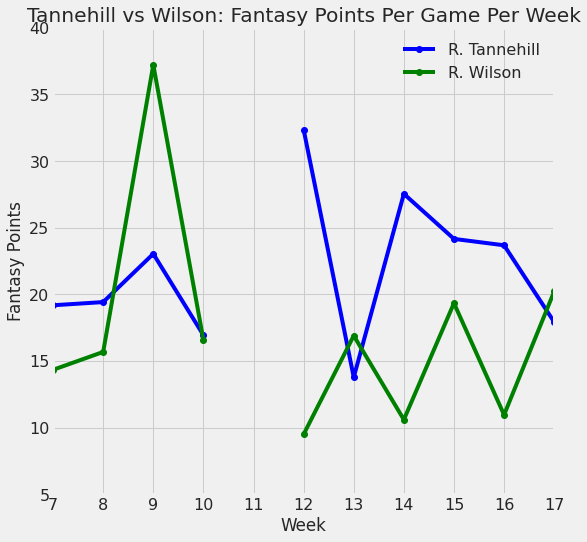

In [24]:
rcParams['figure.figsize'] = 8, 8
tannehill, = plt.plot(top_qbs.Tannehill, 'o-', color='blue') 
wilson, = plt.plot(top_qbs.Wilson, 'o-', color = 'green')
plt.title('Tannehill vs Wilson: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.ylim(5,40)
plt.yticks([5,10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, wilson], ['R. Tannehill', 'R. Wilson'])
plt.style.use('fivethirtyeight')

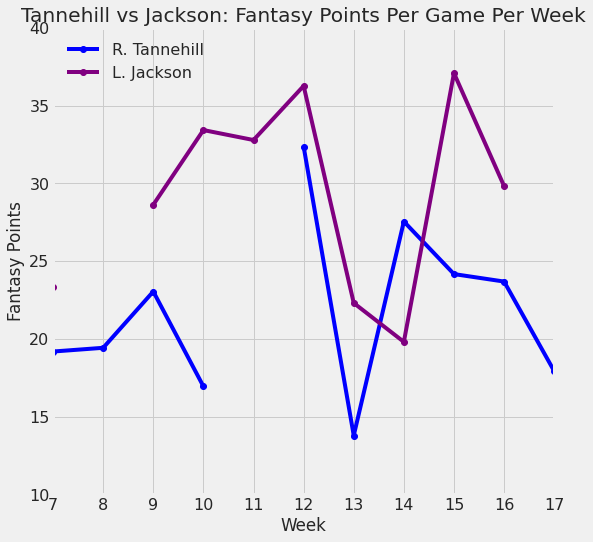

In [25]:
rcParams['figure.figsize'] = 8, 8
tannehill, = plt.plot(top_qbs.Tannehill, 'o-', color = 'blue') 
jackson, = plt.plot(top_qbs.Jackson, 'o-', color = 'Purple')
plt.title('Tannehill vs Jackson: Fantasy Points Per Game Per Week')
plt.xlabel('Week')
plt.ylabel('Fantasy Points')
plt.xlim(7,17)
plt.ylim(10,40)
plt.yticks([10, 15, 20,25,30,35,40])
plt.xticks([7,8,9,10,11,12,13,14,15,16,17])
plt.legend([tannehill, jackson], ['R. Tannehill', 'L. Jackson'])
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, "Fantasy Points per Game for AFC Playoff QB's")

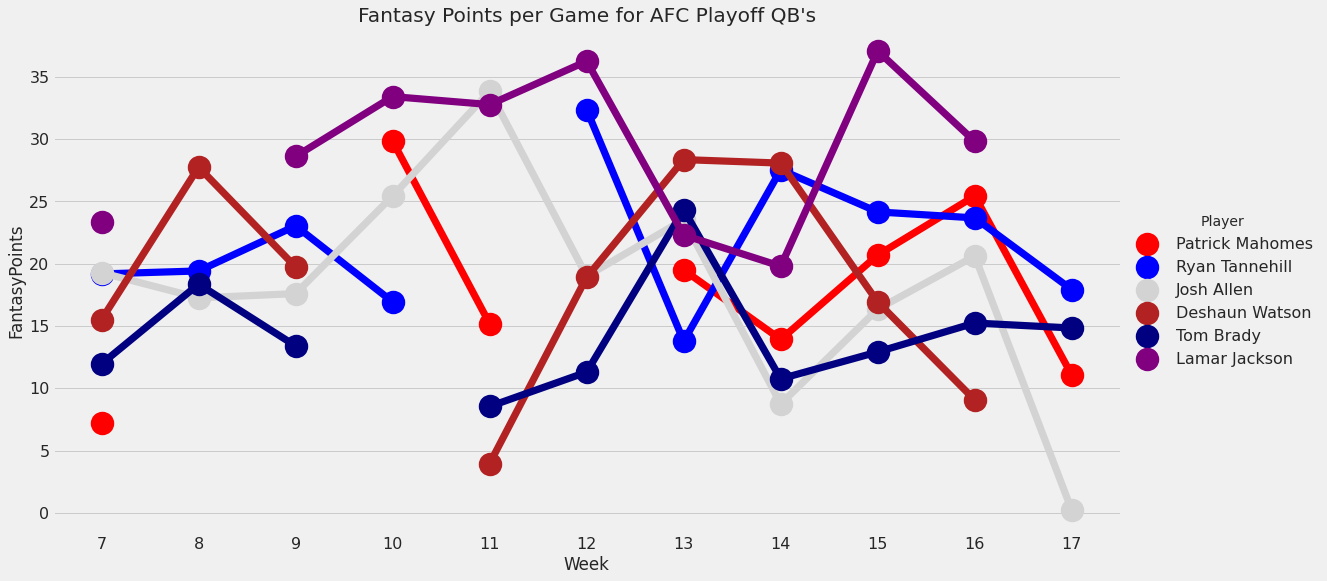

In [26]:
afc = qb_df_week[(qb_df_week['Player'] == 'Ryan Tannehill') | (qb_df_week['Player'] == 'Patrick Mahomes') |
                (qb_df_week['Player'] == 'Lamar Jackson') | (qb_df_week['Player'] == 'Tom Brady') |
                (qb_df_week['Player'] == 'Deshaun Watson') | (qb_df_week['Player'] == 'Josh Allen')]
afc = afc[afc['Week'] >= 7]
sns.factorplot( x='Week', y='FantasyPoints', data = afc, hue='Player', size = 8, aspect = 2, palette=['red','blue', 'lightgray', 'firebrick', 'navy', 'purple'])
plt.title("Fantasy Points per Game for AFC Playoff QB's")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, "Fantasy Points per Game for NFC Playoff QB's vs Ryan Tannehill")

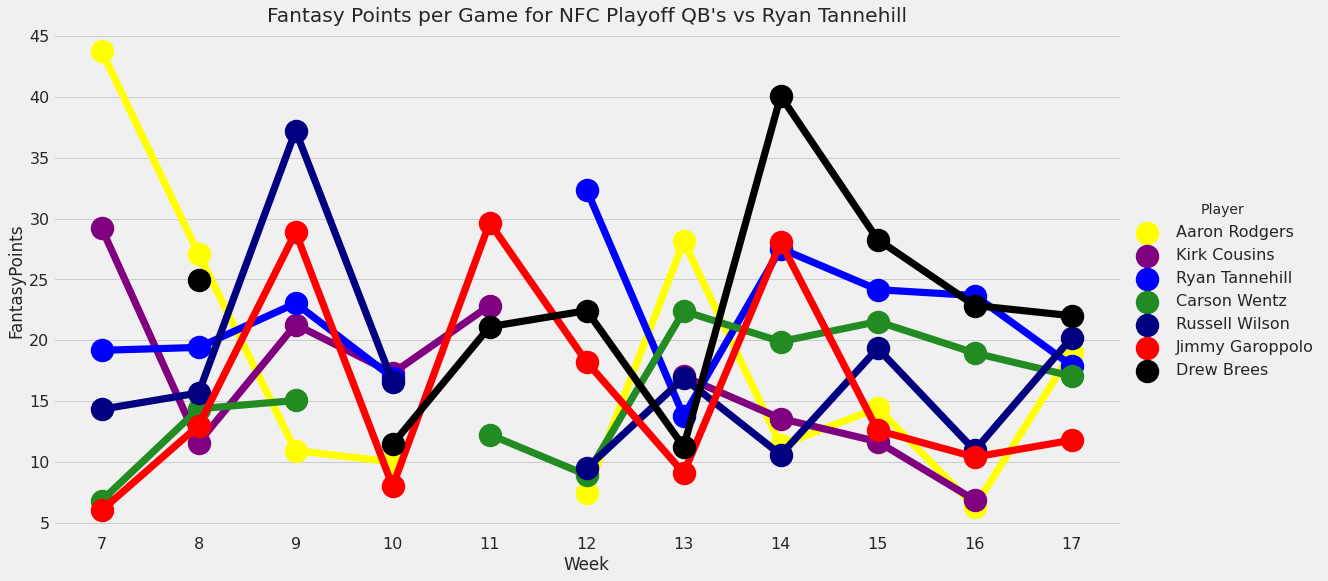

In [27]:
nfc = qb_df_week[(qb_df_week['Player'] == 'Jimmy Garoppolo') | (qb_df_week['Player'] == 'Russell Wilson') |
                (qb_df_week['Player'] == 'Drew Brees') | (qb_df_week['Player'] == 'Kirk Cousins') |
                (qb_df_week['Player'] == 'Ryan Tannehill') | (qb_df_week['Player'] == 'Aaron Rodgers')
                | (qb_df_week['Player'] == 'Carson Wentz')]
nfc = nfc[nfc['Week'] >= 7]
sns.factorplot( x='Week', y='FantasyPoints', data = nfc, hue='Player', size = 8, aspect = 2, palette=['yellow','purple', 'blue', 'forestgreen', 'navy', 'red','black'])
plt.title("Fantasy Points per Game for NFC Playoff QB's vs Ryan Tannehill")

Wow, Garoppolo was inconsistent.

In [28]:
qb_df_week = qb_df_week[qb_df_week['PassingAtt'] >= 10]

In [29]:
rt = qb_df_week.groupby('Player').get_group('Ryan Tannehill')
columns = ['Week', 'PassingYds', 'PassingTD', 'PassingAtt', 'Cmp', 'TotalTD','RushingAtt', 'RushingYds', 'RushingTD', 'FL', 'Int', 'FantasyPoints']
rt = rt[columns]
rt = rt[rt['Week'] >= 7]
rt.describe()

,Week,PassingYds,PassingTD,PassingAtt,Cmp,TotalTD,RushingAtt,RushingYds,RushingTD,FL,Int,FantasyPoints
count,10.000000,10.0000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12.100000,259.8000,2.200000,27.000000,18.800000,2.600000,4.000000,18.100000,0.400000,0.300000,0.500000,21.802000
std,3.478505,71.5461,0.632456,7.333333,4.732864,0.699206,1.563472,15.437688,0.699206,0.483046,0.707107,5.483571
min,7.000000,181.0000,1.000000,18.000000,13.000000,2.000000,1.000000,-3.000000,0.000000,0.000000,0.000000,13.780000
25%,9.250000,194.2500,2.000000,20.500000,14.750000,2.000000,3.250000,7.250000,0.000000,0.000000,0.000000,18.235000
50%,12.500000,265.5000,2.000000,27.000000,19.000000,2.500000,4.000000,14.500000,0.000000,0.000000,0.000000,21.230000
75%,14.750000,303.7500,2.750000,32.000000,21.750000,3.000000,4.750000,32.750000,0.750000,0.750000,1.000000,24.040000
max,17.000000,391.0000,3.000000,39.000000,27.000000,4.000000,7.000000,40.000000,2.000000,1.000000,2.000000,32.360000


In [30]:
brees = qb_df_week.groupby('Player').get_group('Drew Brees')
brees = brees[columns]
brees.describe()

,Week,PassingYds,PassingTD,PassingAtt,Cmp,TotalTD,RushingAtt,RushingYds,RushingTD,FL,Int,FantasyPoints
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,11.700000,294.100000,2.700000,37.300000,27.800000,2.800000,0.900000,-0.400000,0.100000,0.0,0.300000,22.524000
std,4.667857,61.383041,1.418136,5.774465,5.329165,1.619328,1.197219,1.074968,0.316228,0.0,0.483046,8.168698
min,1.000000,184.000000,0.000000,30.000000,18.000000,0.000000,0.000000,-3.000000,0.000000,0.0,0.000000,11.260000
25%,10.250000,259.500000,2.250000,31.250000,27.250000,2.250000,0.000000,-0.750000,0.000000,0.0,0.000000,20.880000
50%,12.500000,297.000000,3.000000,38.500000,29.000000,3.000000,0.500000,0.000000,0.000000,0.0,0.000000,22.230000
75%,14.750000,339.500000,3.000000,42.250000,31.500000,3.000000,1.000000,0.000000,0.000000,0.0,0.750000,24.405000
max,17.000000,373.000000,5.000000,45.000000,34.000000,6.000000,3.000000,1.000000,1.000000,0.0,1.000000,40.060000


In [31]:
jw = qb_df_week.groupby('Player').get_group('Jameis Winston')
jw = jw[columns]
jw.describe()

,Week,PassingYds,PassingTD,PassingAtt,Cmp,TotalTD,RushingAtt,RushingYds,RushingTD,FL,Int,FantasyPoints
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.00000,16.000000,16.000000
mean,9.125000,319.312500,2.062500,39.125000,23.750000,2.125000,3.687500,15.625000,0.0625,0.31250,1.875000,18.585000
std,5.188127,86.737703,1.236595,9.507015,6.234314,1.360147,2.301268,15.688106,0.2500,0.60208,1.586401,8.576895
min,1.000000,194.000000,0.000000,24.000000,13.000000,0.000000,1.000000,-1.000000,0.0000,0.00000,0.000000,7.060000
25%,4.750000,253.000000,1.000000,31.750000,19.500000,1.000000,2.000000,4.750000,0.0000,0.00000,0.750000,12.155000
50%,9.500000,324.000000,2.000000,41.500000,24.000000,2.000000,3.000000,11.000000,0.0000,0.00000,2.000000,17.400000
75%,13.250000,381.250000,3.000000,45.750000,29.250000,3.000000,5.250000,20.750000,0.0000,0.25000,3.000000,24.615000
max,17.000000,458.000000,4.000000,54.000000,33.000000,5.000000,8.000000,53.000000,1.0000,2.00000,5.000000,34.740000


In [32]:
qb_df_week.groupby('Player')[['FantasyPoints']].std().sort_values(by= 'FantasyPoints', ascending=True)

,FantasyPoints
Player,
Mason Rudolph,4.616829
Carson Wentz,5.136167
Derek Carr,5.423917
Gardner Minshew,5.642042
Philip Rivers,5.975500
Joe Flacco,5.987959
Dwayne Haskins,5.990034
Josh Allen,6.191101
Baker Mayfield,6.235017


In [43]:
week7['GamesPlayed'] = week7.groupby('Player')['Week'].transform('count')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,FL,FantasyPoints,Week,TotalTD,Usage,Y/A,GamesPlayed
0,Aaron Rodgers,QB,GNB,429.0,5.0,0.0,31.0,25.0,2.0,6.0,1.0,0.0,43.76,7,6.0,2.0,13.838710,10
3,Kirk Cousins,QB,MIN,338.0,4.0,0.0,34.0,24.0,4.0,-3.0,0.0,0.0,29.22,7,4.0,4.0,9.941176,9
4,Jacoby Brissett,QB,IND,326.0,4.0,0.0,39.0,26.0,5.0,6.0,0.0,1.0,27.64,7,4.0,5.0,8.358974,9
5,Patrick Mahomes,QB,KAN,76.0,1.0,0.0,11.0,10.0,1.0,2.0,0.0,0.0,7.24,7,1.0,1.0,6.909091,8
6,Ryan Tannehill,QB,TEN,312.0,2.0,1.0,29.0,23.0,5.0,7.0,0.0,0.0,19.18,7,2.0,5.0,10.758621,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Andy Dalton,QB,CIN,190.0,1.0,1.0,28.0,16.0,8.0,10.0,1.0,0.0,16.60,17,2.0,8.0,6.785714,7
27,Kyle Allen,QB,CAR,295.0,0.0,1.0,41.0,25.0,2.0,5.0,0.0,0.0,10.30,17,0.0,2.0,7.195122,9
28,Aaron Rodgers,QB,GNB,323.0,2.0,1.0,55.0,27.0,2.0,1.0,0.0,0.0,19.02,17,2.0,2.0,5.872727,10
29,Jacoby Brissett,QB,IND,162.0,0.0,0.0,25.0,12.0,4.0,17.0,0.0,2.0,4.18,17,0.0,4.0,6.480000,9


In [44]:
week7 = qb_df_week[qb_df_week['Week'] >= 7]
week7['GamesPlayed'] = week7.groupby('Player')['Week'].transform('count')
week7.groupby(['Player', 'GamesPlayed'])[['FantasyPoints']].std().sort_values(by= 'FantasyPoints', ascending=True).head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,,FantasyPoints
Player,GamesPlayed,
Joe Flacco,2,0.947523
Matthew Stafford,3,2.670905
Tom Brady,10,4.486771
Baker Mayfield,10,4.991938
Mason Rudolph,6,5.083664
Dwayne Haskins,7,5.193004
Carson Wentz,10,5.241756
Philip Rivers,10,5.405078
Ryan Tannehill,10,5.483571


# **How much did the Marcus Mariota to Ryan Tannehill switch in Week 7 affect the offense's Fantasy Footabll performance?**

In [34]:
# 2. How much did the Marcus Mariota -> Ryan Tannehill switch in Week 7 affect the offense's Fantasy Footabll performance?
# do a factor plot from youtube video watch later
# 3. Did Ryan Tannehill over-perform in the 2019-2020 season and is he due for a regression in the 2020-2021 season?

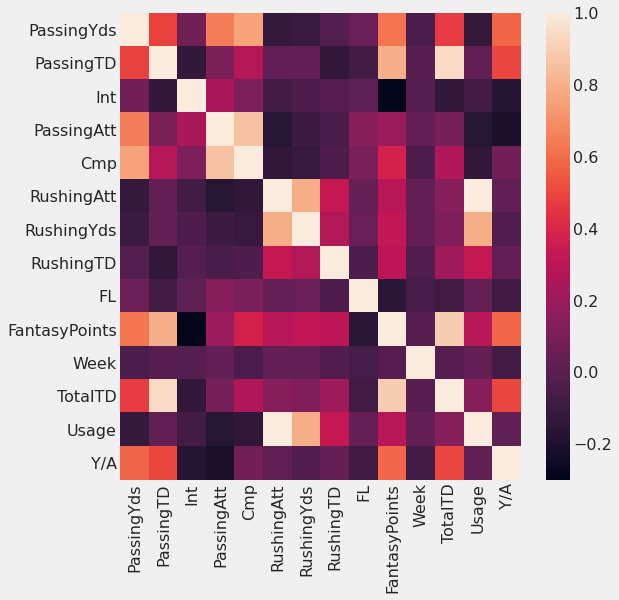

In [35]:
# Calculate correlations
corr = qb_df_week.corr()
 
# Heatmap
sns.heatmap(corr)

(0.0, 70.0)

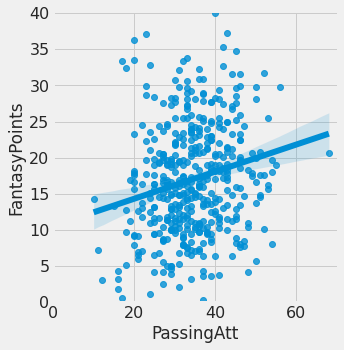

In [36]:
# Do a linear regression to investigate how passing attempts affects fantasy points bc people argue tannehill doesnt throw enough to be relevant
sns.lmplot(x='PassingAtt', y='FantasyPoints', data=qb_df_week)
plt.ylim(0, 40)
plt.xlim(0,70)